In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("../Data/train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##### Only 38% of passengers survived the Titanic disaster, highlighting the severity of the tragedy. This low survival rate suggests that lifeboat capacity, evacuation protocols, and social factors like class and gender may have played a critical role in determining who lived and who didn’t.

In [6]:
df.describe(include="object")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,G6,S
freq,1,577,7,4,644


##### With 644 passengers boarding at port “S” (Southampton), it was clearly the primary embarkation point for the Titanic. This concentration of passengers may reflect Southampton’s role as a major transatlantic hub and could influence survival patterns, especially if passengers from this port were disproportionately represented in certain classes or cabins.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df[['Age','Fare']].describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


##### With a mean age of around 29, the passenger population aboard the Titanic was predominantly composed of adults in their prime working or traveling years. This age distribution suggests that the voyage attracted individuals who were likely independent, economically active, and possibly traveling for business, migration, or leisure—rather than large families with very young children or elderly dependents.

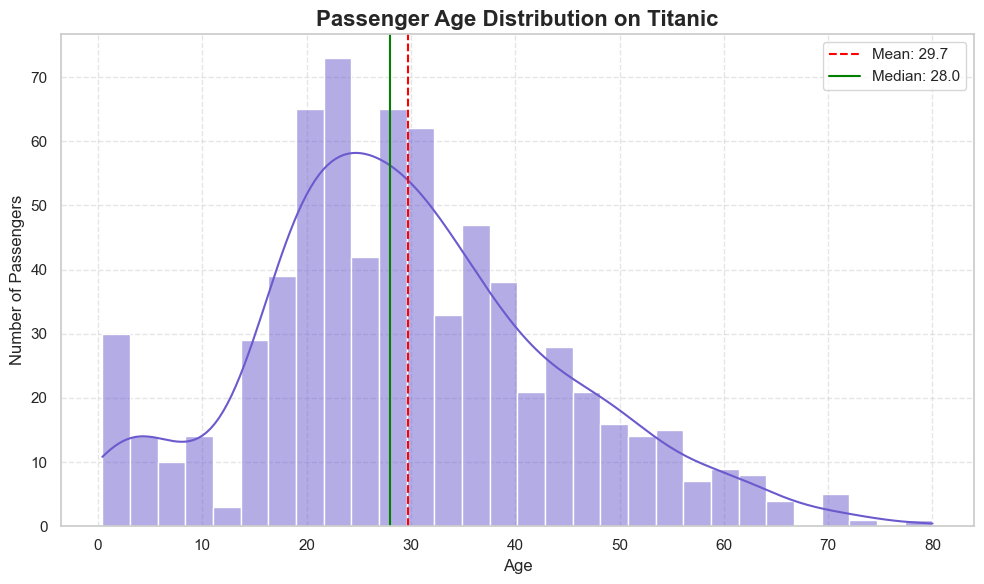

In [9]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(
    data=df,
    x='Age',
    bins=30,
    kde=True,
    color="#6A5ACD", 
    edgecolor="white"
)

# Add titles and labels with formatting
plt.title('Passenger Age Distribution on Titanic', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.5)

mean_age = df['Age'].mean()
median_age = df['Age'].median()
plt.axvline(mean_age, color='red', linestyle='--', label=f'Mean: {mean_age:.1f}')
plt.axvline(median_age, color='green', linestyle='-', label=f'Median: {median_age:.1f}')
plt.legend()

plt.tight_layout()
plt.show()


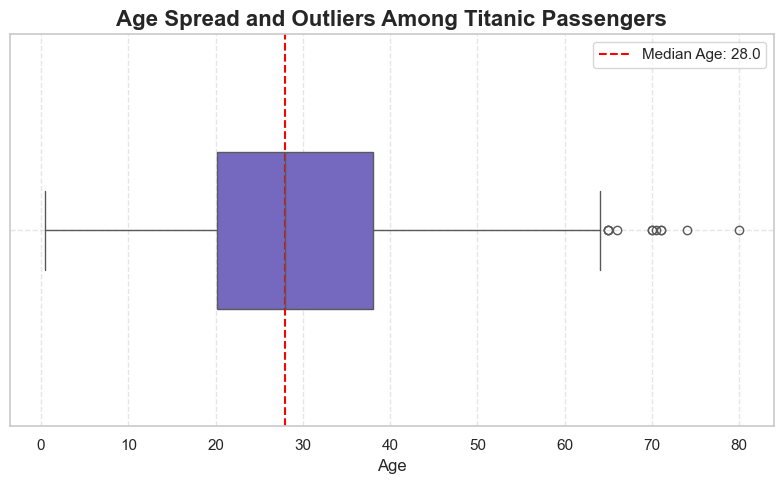

In [10]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 5))
sns.boxplot(x='Age', data=df, color="#6A5ACD", width=0.4)

plt.title('Age Spread and Outliers Among Titanic Passengers', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.5)

median_age = df['Age'].median()
outliers = df[(df['Age'] < df['Age'].quantile(0.25) - 1.5 * (df['Age'].quantile(0.75) - df['Age'].quantile(0.25))) |
              (df['Age'] > df['Age'].quantile(0.75) + 1.5 * (df['Age'].quantile(0.75) - df['Age'].quantile(0.25)))]

plt.axvline(median_age, color='red', linestyle='--', label=f'Median Age: {median_age:.1f}')
plt.legend()

plt.tight_layout()
plt.show()


##### The age distribution of Titanic passengers was centered around young adulthood, with a mean of 29.7 and a median of 28, indicating that most travelers were in their prime working or traveling years — a demographic that may have influenced survival dynamics during the disaster.

In [11]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [12]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

C:\Users\91941\AppData\Local\Temp\ipykernel_14120\3279932046.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=df, palette={'male': '#3498db', 'female': '#e74c3c'})


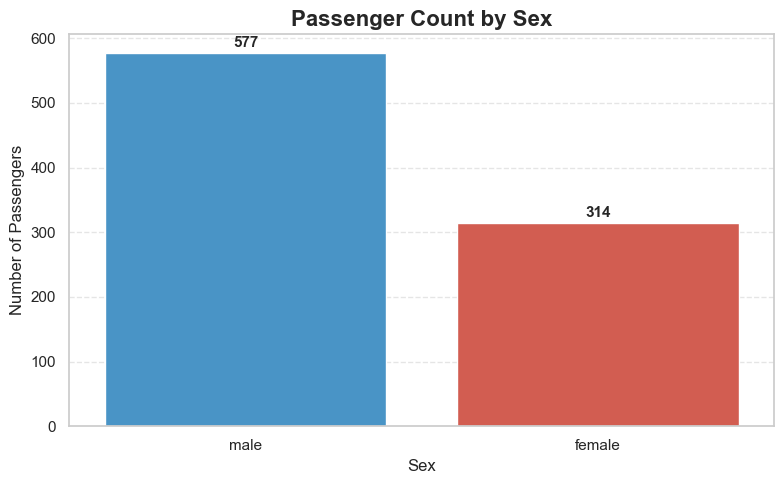

In [13]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 5))
sns.countplot(x='Sex', data=df, palette={'male': '#3498db', 'female': '#e74c3c'})

plt.title('Passenger Count by Sex', fontsize=16, fontweight='bold')
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=12)

sex_counts = df['Sex'].value_counts()
for i, count in enumerate(sex_counts):
    plt.text(i, count + 10, str(count), ha='center', fontsize=11, fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


##### The Titanic passenger list was predominantly male, with 577 men compared to 314 women, reflecting a gender imbalance that may have shaped survival outcomes under the “women and children first” evacuation policy.

C:\Users\91941\AppData\Local\Temp\ipykernel_14120\2799686161.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pclass', data=df, palette={'1': '#2ecc71', '2': '#f1c40f', '3': '#e74c3c'})


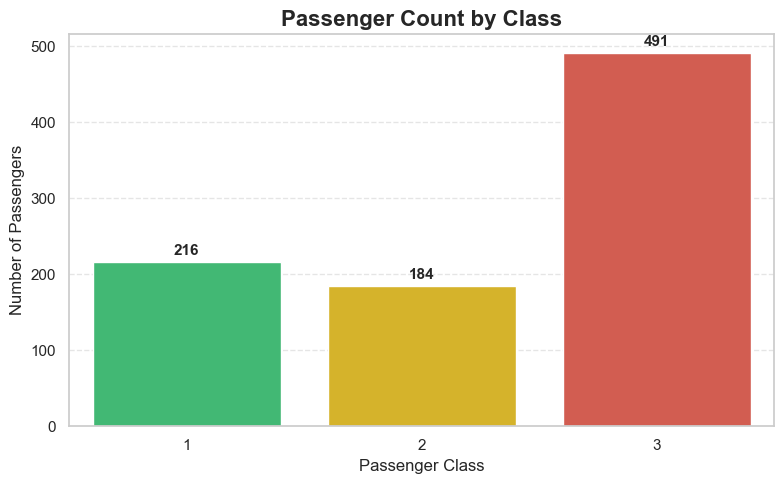

In [14]:
# Set a clean style
sns.set(style="whitegrid")

# Create the countplot with a custom palette
plt.figure(figsize=(8, 5))
sns.countplot(x='Pclass', data=df, palette={'1': '#2ecc71', '2': '#f1c40f', '3': '#e74c3c'})

# Add title and axis labels
plt.title('Passenger Count by Class', fontsize=16, fontweight='bold')
plt.xlabel('Passenger Class', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=12)

# Add value annotations on top of bars
class_counts = df['Pclass'].value_counts().sort_index()
for i, count in enumerate(class_counts):
    plt.text(i, count + 10, str(count), ha='center', fontsize=11, fontweight='bold')

# Optional gridlines
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


##### The majority of Titanic passengers traveled in 3rd class (491 out of 891), far outnumbering those in 1st (216) and 2nd class (184), which reflects the ship’s role in transporting large numbers of lower-income individuals—many of whom may have faced greater barriers to survival due to limited access to lifeboats and restricted movement within the ship.

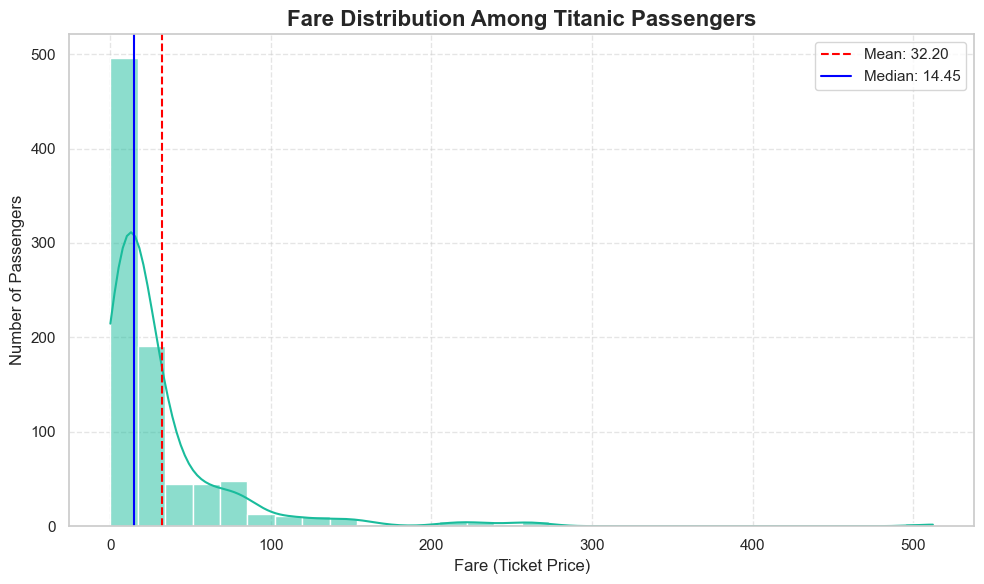

In [15]:
# Set a clean visual style
sns.set(style="whitegrid")

# Create the histogram with enhancements
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df,
    x='Fare',
    bins=30,
    kde=True,
    color="#1abc9c",  # Teal tone
    edgecolor="white"
)

# Add title and axis labels
plt.title('Fare Distribution Among Titanic Passengers', fontsize=16, fontweight='bold')
plt.xlabel('Fare (Ticket Price)', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=12)

# Add gridlines for readability
plt.grid(True, linestyle='--', alpha=0.5)

# Add vertical lines for mean and median
mean_fare = df['Fare'].mean()
median_fare = df['Fare'].median()
plt.axvline(mean_fare, color='red', linestyle='--', label=f'Mean: {mean_fare:.2f}')
plt.axvline(median_fare, color='blue', linestyle='-', label=f'Median: {median_fare:.2f}')
plt.legend()

plt.tight_layout()
plt.show()


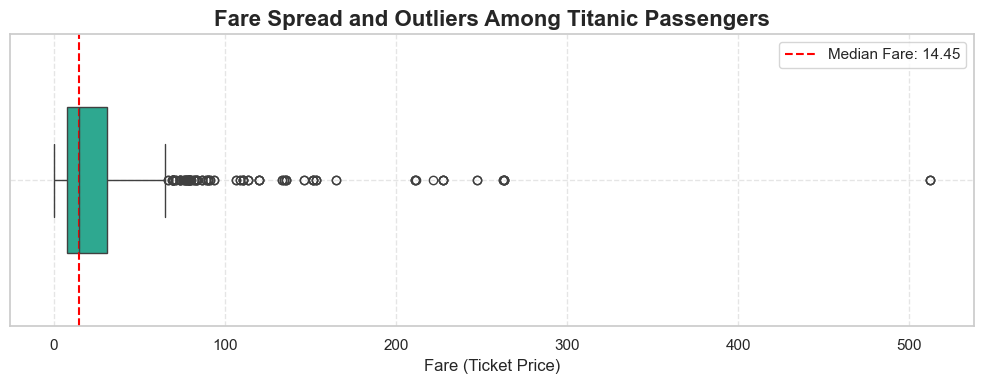

In [16]:
# Set a clean visual style
sns.set(style="whitegrid")

# Create the boxplot
plt.figure(figsize=(10, 4))
sns.boxplot(data=df, x="Fare", color="#1abc9c", width=0.5)

# Add title and axis label
plt.title('Fare Spread and Outliers Among Titanic Passengers', fontsize=16, fontweight='bold')
plt.xlabel('Fare (Ticket Price)', fontsize=12)

# Add gridlines for clarity
plt.grid(True, linestyle='--', alpha=0.5)

# Annotate median fare
median_fare = df['Fare'].median()
plt.axvline(median_fare, color='red', linestyle='--', label=f'Median Fare: {median_fare:.2f}')
plt.legend()

plt.tight_layout()
plt.show()


##### The fare distribution among Titanic passengers is highly right-skewed, with a median fare of 14.45, indicating that most passengers opted for lower-cost tickets. However, the presence of extreme outliers—some fares exceeding 100—reveals a stark economic divide, suggesting that while the majority traveled in modest conditions, a select few occupied premium accommodations, likely in 1st class.

In [17]:
pd.crosstab(df['Sex'],df['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


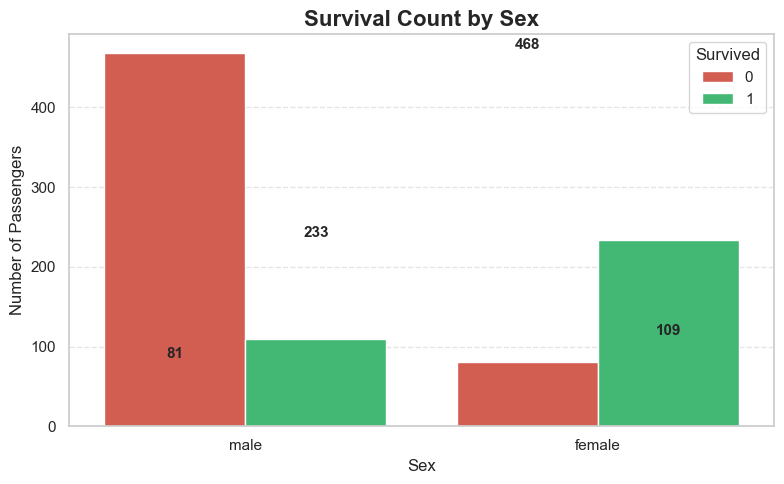

In [18]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 5))
sns.countplot(
    data=df,
    x='Sex',
    hue='Survived',
    palette={0: '#e74c3c', 1: '#2ecc71'}  
)

plt.title('Survival Count by Sex', fontsize=16, fontweight='bold')
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=12)

sex_survival_counts = df.groupby(['Sex', 'Survived']).size().unstack()
for i, sex in enumerate(sex_survival_counts.index):
    for j, survived in enumerate(sex_survival_counts.columns):
        count = sex_survival_counts.loc[sex, survived]
        plt.text(i - 0.2 + j * 0.4, count + 5, str(count), ha='center', fontsize=11, fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


##### Survival rates on the Titanic were heavily influenced by gender: while only 19% of male passengers survived (109 out of 577), a striking 74% of female passengers survived (233 out of 314). This stark contrast reflects the “women and children first” evacuation policy, which prioritized female passengers during the rescue efforts.

In [19]:
pd.crosstab(df['Pclass'],df['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


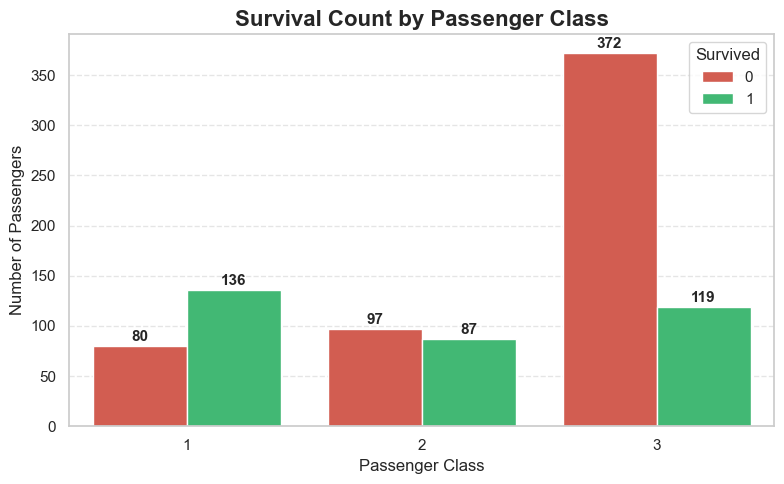

In [20]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 5))
sns.countplot(
    data=df,
    x='Pclass',
    hue='Survived',
    palette={0: '#e74c3c', 1: '#2ecc71'}  
)

plt.title('Survival Count by Passenger Class', fontsize=16, fontweight='bold')
plt.xlabel('Passenger Class', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=12)

class_survival_counts = df.groupby(['Pclass', 'Survived']).size().unstack()
for i, pclass in enumerate(class_survival_counts.index):
    for j, survived in enumerate(class_survival_counts.columns):
        count = class_survival_counts.loc[pclass, survived]
        plt.text(i - 0.2 + j * 0.4, count + 5, str(count), ha='center', fontsize=11, fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


##### Survival rates on the Titanic varied dramatically by passenger class: 1st class passengers had the highest survival rate (136 out of 216, ~63%), followed by 2nd class (87 out of 184, ~47%), while 3rd class passengers had the lowest survival rate (119 out of 491, ~24%). This stark gradient reflects the influence of socioeconomic status on survival, with wealthier passengers likely having better cabin locations, quicker access to lifeboats, and higher priority during evacuation.

In [21]:
df.groupby('Survived')['Age'].mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

C:\Users\91941\AppData\Local\Temp\ipykernel_14120\534408122.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived', y='Age', data=df, palette={'0': "#FF6F61", '1': "#6B5B95"})


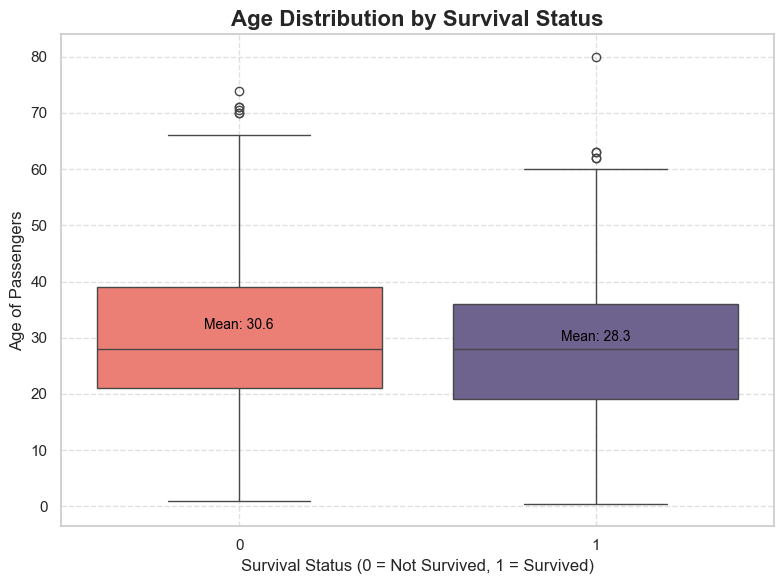

In [22]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='Age', data=df, palette={'0': "#FF6F61", '1': "#6B5B95"})

# Add titles and axis labels with better formatting
plt.title('Age Distribution by Survival Status', fontsize=16, fontweight='bold')
plt.xlabel('Survival Status (0 = Not Survived, 1 = Survived)', fontsize=12)
plt.ylabel('Age of Passengers', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.6)

medians = df.groupby('Survived')['Age'].mean()
for i, median in enumerate(medians):
    plt.text(i, median + 1, f'Mean: {median:.1f}', ha='center', color='black', fontsize=10)

plt.tight_layout()
plt.show()


##### Passengers who survived the Titanic disaster were, on average, slightly younger (mean age ≈ 28.3) than those who did not survive (mean age ≈ 30.6). While the difference is modest, it suggests that younger individuals may have had a slight advantage—possibly due to greater mobility, quicker response during evacuation, or prioritization of children and young adults.

In [23]:
df.groupby('Survived')['Fare'].mean()

Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64

C:\Users\91941\AppData\Local\Temp\ipykernel_14120\570275440.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived', y='Fare', data=df, palette={'0': '#e74c3c', '1': '#2ecc71'}, width=0.6)


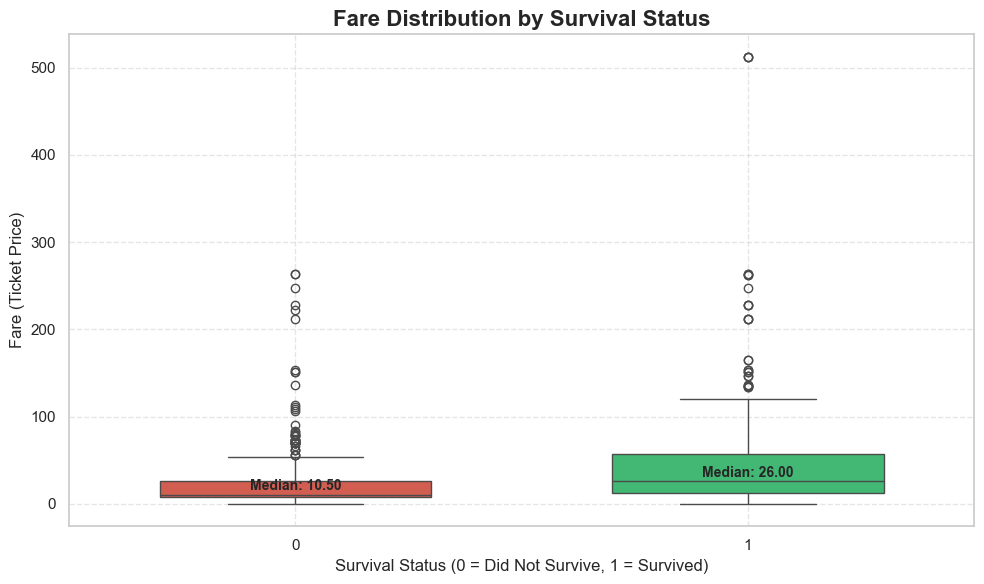

In [24]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Fare', data=df, palette={'0': '#e74c3c', '1': '#2ecc71'}, width=0.6)

plt.title('Fare Distribution by Survival Status', fontsize=16, fontweight='bold')
plt.xlabel('Survival Status (0 = Did Not Survive, 1 = Survived)', fontsize=12)
plt.ylabel('Fare (Ticket Price)', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.5)

median_fares = df.groupby('Survived')['Fare'].median()
for i, median in enumerate(median_fares):
    plt.text(i, median + 5, f'Median: {median:.2f}', ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


##### Survivors paid significantly higher fares on average (≈ ₹48.40) compared to non-survivors (≈ ₹22.12), suggesting that passengers in wealthier classes had better access to lifeboats and safety measures. This reinforces the idea that socioeconomic status played a major role in determining survival odds aboard the Titanic.

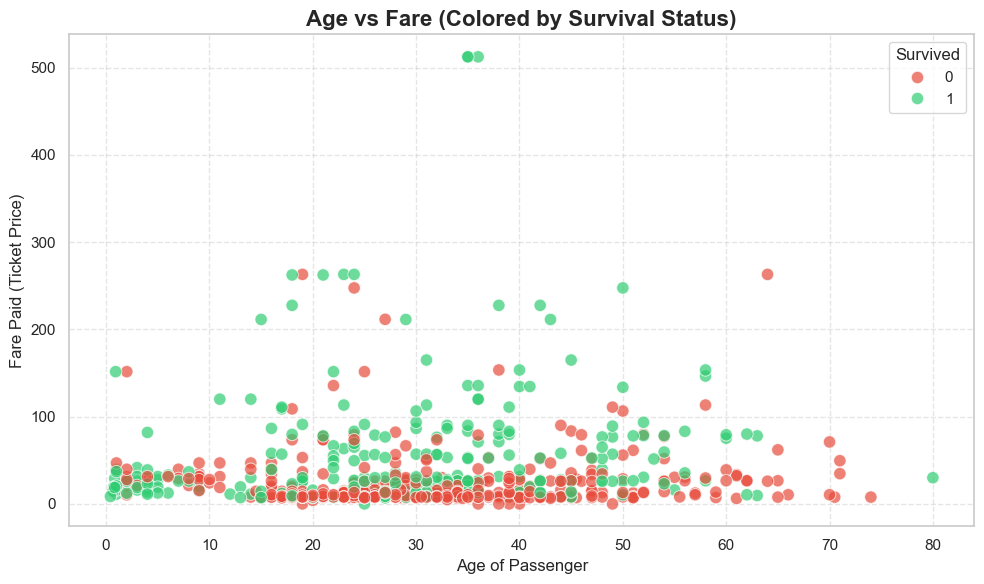

In [25]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Age',
    y='Fare',
    hue='Survived',
    data=df,
    palette={0: '#e74c3c', 1: '#2ecc71'},  
    alpha=0.7,
    edgecolor='w',
    s=80
)

plt.title('Age vs Fare (Colored by Survival Status)', fontsize=16, fontweight='bold')
plt.xlabel('Age of Passenger', fontsize=12)
plt.ylabel('Fare Paid (Ticket Price)', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.5)

plt.legend(title='Survived', loc='upper right')

plt.tight_layout()
plt.show()


##### The scatterplot of age versus fare reveals that non-survivors were densely concentrated in the lower fare range and aged between 20 and 60, suggesting that lower-class adult passengers faced the greatest survival disadvantage. In contrast, survivors are more widely distributed across the graph, with a noticeable cluster of younger individuals who paid higher fares — likely 1st class passengers — indicating that youth and wealth significantly increased the odds of survival.

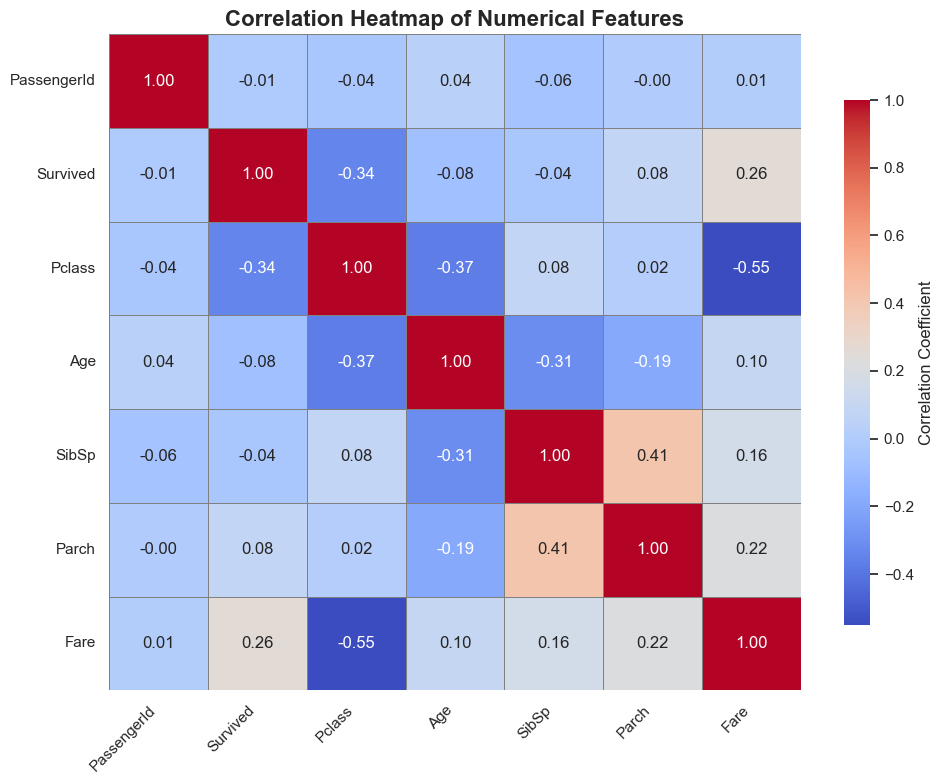

In [26]:
sns.set(style="white")

corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(
    data=corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"}
)

plt.title("Correlation Heatmap of Numerical Features", fontsize=16, fontweight='bold')

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()


##### The heatmap reveals the negative correlation between passenger class and age (-0.37) suggests that older individuals tended to occupy higher classes, possibly reflecting greater financial stability or social status among older travelers.

In [27]:
import scipy.stats as stats

contingency = pd.crosstab(df['Sex'], df['Survived'])
chi2, p, dof, expected = stats.chi2_contingency(contingency)
p


np.float64(1.1973570627755645e-58)

##### Chi-Square Test Result (Sex vs Survived): The p-value of 1.19 × 10⁻⁵⁸ is far below the conventional significance threshold of 0.05, which means we reject the null hypothesis that survival is independent of sex.

In [28]:
survived_fare = df[df['Survived']==1]['Fare'].dropna()
not_survived_fare = df[df['Survived']==0]['Fare'].dropna()
stats.ttest_ind(survived_fare, not_survived_fare)


TtestResult(statistic=np.float64(7.939191660871055), pvalue=np.float64(6.120189341924198e-15), df=np.float64(889.0))

##### Since the p-value is far below the conventional threshold of 0.05, we reject the null hypothesis. This means:

##### Survivors paid significantly higher fares than non-survivors.

##### This result strongly suggests that passenger wealth or class status played a major role in survival. Higher fares are typically associated with 1st class passengers, who had better access to lifeboats and safety measures during the evacuation.

In [29]:
survived_age = df[df['Survived']==1]['Age'].dropna()
not_survived_age = df[df['Survived']==0]['Age'].dropna()

stats.ttest_ind(survived_age, not_survived_age)


TtestResult(statistic=np.float64(-2.06668694625381), pvalue=np.float64(0.03912465401348249), df=np.float64(712.0))

##### Since the p-value is less than 0.05, we reject the null hypothesis. This means:

##### There is a statistically significant difference in age between survivors and non-survivors.

##### The negative t-statistic indicates that survivors were, on average, younger than non-survivors.

In [30]:
age_fare = df[['Age','Fare']].dropna()

pearson_corr, pearson_p = stats.pearsonr(age_fare['Age'], age_fare['Fare'])
spearman_corr, spearman_p = stats.spearmanr(age_fare['Age'], age_fare['Fare'])

pearson_corr, pearson_p, spearman_corr, spearman_p


(np.float64(0.09606669176903888),
 np.float64(0.010216277504447086),
 np.float64(0.1350512177342878),
 np.float64(0.0002958090324306091))

##### Both correlations are positive, meaning older passengers tended to pay slightly higher fares.

##### The relationship is statistically significant (p < 0.05), so it's unlikely to be due to random chance.

##### However, the effect size is small — the correlation coefficients are close to zero, indicating that age and fare are only weakly related

In [31]:
from scipy.stats import pointbiserialr

corr, p = pointbiserialr(df['Survived'], df['Fare'])
corr, p


(np.float64(0.2573065223849624), np.float64(6.120189341924586e-15))

##### - The positive correlation (r = 0.257) indicates that passengers who paid higher fares were more likely to survive.

##### - The p-value is extremely small, meaning this relationship is statistically significant — it's very unlikely to be due to chance.

In [32]:
filtered_df = df.dropna(subset=['Age'])

# Now run the test
corr, p = pointbiserialr(filtered_df['Survived'], filtered_df['Age'])
print(corr, p)


-0.07722109457217767 0.039124654013482654


##### The negative correlation indicates that younger passengers were slightly more likely to survive.

##### The p-value is below 0.05, so the relationship is statistically significant, though the effect size is very small.

# Summary

##### Overall Survival Rate: Only 38% of passengers survived, underscoring the severity of the disaster and the limited lifeboat capacity.

##### Sex and Survival: Women had a dramatically higher survival rate (74%) compared to men (19%), reflecting the “women and children first” evacuation policy.

##### Class and Survival: Survival rates were highest in 1st class (~63%), followed by 2nd (~47%), and lowest in 3rd class (~24%), revealing a strong link between socioeconomic status and survival odds.

##### Fare and Survival: Survivors paid significantly higher fares on average (₹48.40 vs ₹22.12), reinforcing the idea that wealthier passengers had better access to safety.

##### Age and Survival: Survivors were slightly younger on average (28.3 vs 30.6), suggesting modest advantages for younger passengers, possibly due to mobility or prioritization.